# **Métodos de avaliação de modelos preditivos**

Uma das partes mais importantes da construção de modelos preditivos é verificar se eles estão funcionando da forma desejada. Vamos ver nesse notebook algumas formas diferentes de como fazer isso.


# **Matriz de Confusão**

_(e-book: 2.6.1 Matriz de confusão, p. 14)_

É uma matriz que mostra a frequência de classificação para cada classe analisada pelo modelo. Existem 4 possibilidades para classificar a predição de um modelo, que são:


*   **Verdadeiro Positivo (True Positive):** Quando o modelo classifica de forma correta a classe pertencente são denominados TP (do inglês, True Positive).
*   **Falso Positivo (False Positive):** Quando o modelo não classifica de forma correta a classe pertencente são denominados FP (do inglês, False Positive).
*   **Verdadeiro Negativo (True Negative):** Quando o modelo classifica como não pertencente a uma determinada classe e realmente não pertence são determinados TN (do inglês, True Negative).
*   **Falso Negativo (False Negative):** Quando o modelo classifica como não pertencente a uma determinada classe porém pertence são determinados TN (do inglês, True Negative).

Logo, Podemos organizar essas ideias da seguinte forma:



> 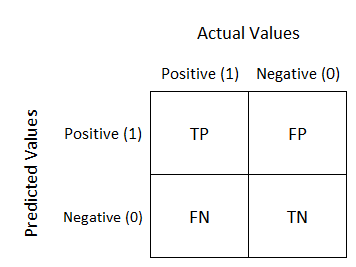


 



# **Exemplo prático**

Suponha um modelo que prediz se uma paciente está gravida ou não, podemos ter uma noção de como funcionaria a matriz de confusão na imagem abaixo:



> 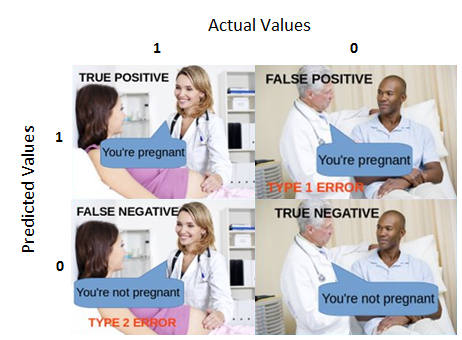


Voltando ao modelo, vamos tentar visualizar isso em código!


In [ ]:
import numpy as np

In [ ]:
#Valores da vida real:
valores_reais    = [1, 0, 1, 0, 0, 0, 1, 0, 1, 0]

#Valores preditos pelo modelo:
valores_preditos = [1, 0, 0, 1, 0, 0, 1, 1, 1, 0]

In [ ]:
# Modelo prevê da seguinte forma: 1 para grávida, 0 para não grávida.
def matriz_de_confusao(reais, preditos, labels):

    # Para um número de classes maior que 2:
    if len(labels) > 2:
      # Fica como exercício para vocês pensarem como seria...
      # Uma dica seria uma classe com 3 classes, uma classe pode ser representada como [1, 0, 0], outra como [0, 1, 0] e assim vai...
        return None

    if len(reais) != len(preditos):
        return None
    
    # considerando a primeira classe como a positiva, e a segunda a negativa
    true_class = labels[0]
    negative_class = labels[1]

    # valores preditos corretamente
    tp = 0
    tn = 0
    
    # valores preditos incorretamente
    fp = 0
    fn = 0
    
    for i in range(len(reais)):
      if reais[i] == preditos[i]:
        if reais[i] == 0:
          tn = tn + 1
        else:
          tp = tp + 1
      else:
        if preditos[i] == 0:
          fn = fn + 1
        else:
          fp = fp + 1
    
    return np.array([
        # valores da classe positiva
        [ tp, fp ],
        # valores da classe negativa
        [ fn, tn ]
    ])

In [ ]:
matriz = matriz_de_confusao(reais=valores_reais, preditos=valores_preditos, labels=[1,0])

print(matriz)

[[3 2]
 [1 4]]


# **Métodos de avaliação baseados na matriz de confusão**

Alguns métodos de avaliação são abstraidos desse conceito de matriz de confusão, são eles:

\\
*   **Acurácia (acc):** É o quanto o modelo acerta no geral. Se dá pela divisão das previsões certas pelo número de predições _(e-book: 2.6.2 Acurácia, p. 14)_:
$$acc = \frac{TP + TN}{TP + TN + FP + FN}$$ \\
*   **Recall (rec):** É a proporção de valores positivos classificados corretamente em cada classe. Se dá pela divisão do número de casos positivos verdadeiros pela soma dos casos positivos verdadeiros com os falsos negativos _(e-book: 2.6.4 Recall, p. 15)_:
$$rec = \frac{TP}{TP + FN}$$ \\
*   **Precisão (p):** É o quão bem seu modelo prediz um valor positivo para cada classe. Se dá pela divisão entre o número de casos verdadeiros positivos pelo número de casos que seu modelo disse que era um positivo _(e-book: 2.6.3 Precisão, p. 14)_:
$$p = \frac{TP}{TP + FP}$$ \\
*   **F-Score (f):** É um balanço entre o recall e a precisão, pois um é uma avaliação de classificação correta em relação ao conjunto de dados e o outro é em relação ao modelo _(e-book: 2.6.5 F1-Score, p. 14)_:
$$f = 2\cdot\frac{p \cdot rec}{p + rec}$$ \\


In [ ]:
import pandas as pd

class metricas:

  def __init__(self, matriz, labels=[1, 0]):
    self.tp = matriz[0][0]
    self.fp = matriz[0][1]
    self.fn = matriz[1][0]
    self.tn = matriz[1][1]
    self.labels = labels
    #Acurácia do modelo:
    self.accu = (self.tp + self.tn)/(self.tp + self.tn + self.fp + self.fn)
    #Recall do modelo para cada classe:
    self.rec1 = self.tp/(self.tp + self.fn)
    self.rec0 = self.tn/(self.tn + self.fp)
    #precisão do modelo para cada classe:
    self.p1 = self.tp/(self.tp + self.fp)
    self.p0 = self.tn/(self.tn + self.fn)
    #F-Score do modelo para cada classe:
    self.f1 = 2*self.p1*self.rec1/(self.p1 + self.rec1)
    self.f0 = 2*self.p0*self.rec0/(self.p0 + self.rec0)

  def acc(self):
    return self.accu

  def rec(self):
    return pd.DataFrame({"Classe": self.labels,
                          "Recall": [self.rec1, self.rec0]})
    
  def p(self):
    return pd.DataFrame({"Classe": self.labels,
                          "Precisão": [self.p1, self.p0]})
    
  def f(self):    
    return pd.DataFrame({"Classe": self.labels,
                          "F-Score": [self.f1, self.f0]})
  
  def all(self):
    return pd.DataFrame({"Classe": self.labels,
                          "Recall": [self.rec1, self.rec0],
                         "Precisão": [self.p1, self.p0],
                         "F-Score": [self.f1, self.f0],
                         "Acuracia": [self.accu, self.accu]})

In [ ]:
metric = metricas(matriz)

print(f"Acuracia: {metric.acc()}\n")
print(metric.rec().to_string(index=False))
print("\n")
print(metric.p().to_string(index=False))
print("\n")
print(metric.f().to_string(index=False))
print("\n")
print(metric.all().to_string(index=False))

Acuracia: 0.7

 Classe    Recall
      1  0.750000
      0  0.666667


 Classe  Precisão
      1       0.6
      0       0.8


 Classe   F-Score
      1  0.666667
      0  0.727273


 Classe    Recall  Precisão   F-Score  Acuracia
      1  0.750000       0.6  0.666667       0.7
      0  0.666667       0.8  0.727273       0.7


# **Tipos de Matrizes de Confusão**

Ao tentarmos analisar a matriz de confusão para um modelo de classificação, podemos encontrar algumas situações peculiares. Vamos ver algumas clássicas: (Antes, vamos definir uma função para visualização das matrizes)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

## **A matriz perfeita**

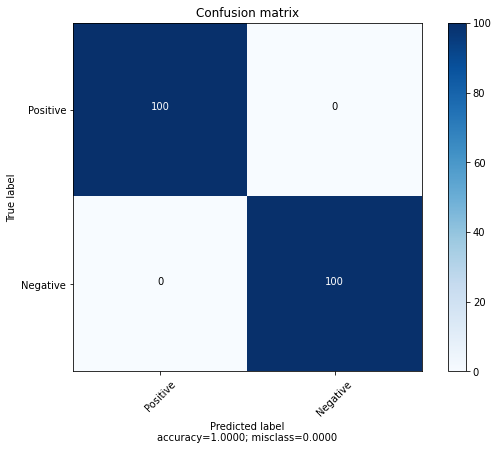

In [ ]:
plot_confusion_matrix(np.array([[100,0],[0,100]]), ['Positive','Negative'], normalize=False)

Essa tipo de saída da matriz de confusão costuma indicar sinais de **Sobreajuste**, é possível acontecer em dados de **treino**, porém não tão comum com dados de **teste** 

## **Um modelo mentiroso**

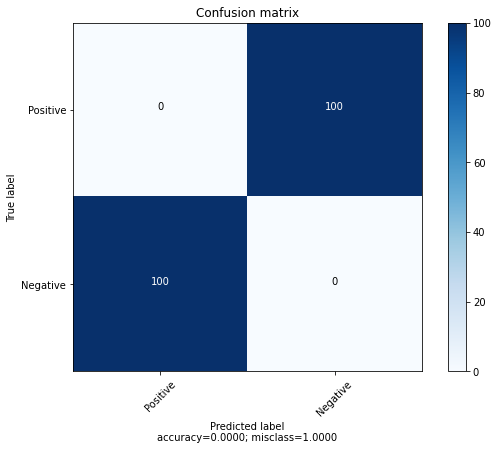

In [ ]:
plot_confusion_matrix(np.array([[0,100],[100,0]]), ['Positive','Negative'], normalize=False)

Essa saída da matriz de confusão nos mostra que o nosso modelo esta errando muito mais para os **falso negativo e falso positivo**, do que para os **verdadeiros positivos e verdadeiros negativos**. Para esse tipo de problema, temos uma possível solução, invertermos os nossos **labels** de nossas predições. Basicamente, invertemos a ideia de que nosso modelo **sempre errar**, para **sempre acertar**.

# **Curva ROC**

_(e-book: 2.6.6 Curva ROC, p. 15)_

A curva ROC (do inglês Receiver Operating Characteristic) é uma ferramenta, baseada nos conceitos de matriz de confusão, utilizada para mensurar um limiar de classificação, ou seja, serve como apoio para definirmos limiares para diferenciação da classificação de um termo em uma classe ou em outra da melhor forma. Com isso, a curva ROC pode ser utilizada para avaliar a performance de um classificador para diferentes limiares de classificação.

Exemplo da ajuda da curva ROC para encontrar um limiar de classificação! Suponha que os pontos amarelos são pessoas infectadas pelo vírus causador da covid-19 e os pontos roxos são pessoas não infectadas pelo vírus.

Note que quando meu limiar de classificação aumenta ou diminue os números de Verdadeiros positivos e de falsos positivos muda!

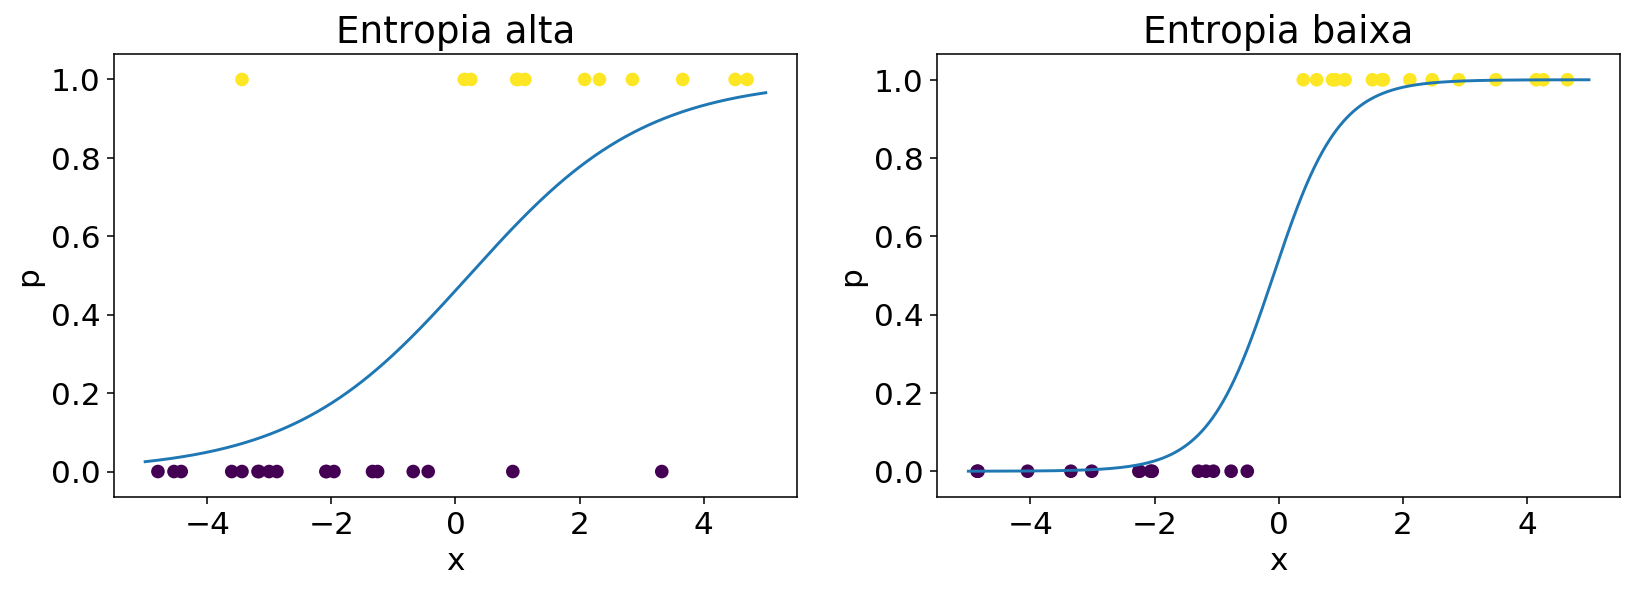


Link para um vídeo legal sobre o assunto: [Vídeo](https://www.youtube.com/watch?v=4jRBRDbJemM)

Exemplo: Vamos utilizar o problema clássico da base de dados IRIS apenas como demonstração do uso da curva ROC.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

# Importando a base de dados
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Ajustando as classes de classificação
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

#Descomentando essa linha, haverá a adição de ruído na base de dados e o problema de classificação se torna um pouco mais difícil!
'''
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

'''
# Separando a base de dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Classificador
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Cálculo dos pontos da curva ROC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calculando a Área da curva ROC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# **Medida de Avaliação de modelos**

A curva é plotada através da medição dos valores de taxa de falsos positivos (FPR — False Positive Rate) X taxa de verdadeiros positivos (TPR — True Positive Rate).


$$TPR = \frac{TP}{TP + FN}$$\
$$FPR = \frac{FP}{FP + TN}$$


Por isso, um método de avaliação eficiente se dá pelo cálculo da área embaixo da curva (AUC - do inglês, área abaixo da curva), pois quanto mais verdadeiros positivos existirem mais a curva se aproxima do canto superior esquerdo, assim, obtendo uma maior taxa de sucesso e, consequentemente uma maior área no gráfico. Logo, quanto maior a área abaixo da curva, maior a taxa de sucesso do seu modelo! Por fim, valores limiares e as taxas escolhidas interferem diretamente nos valores de acurácia, precisão, recall... pois a curva lida com as taxas de verdadeiros positivos e falsos positivos.

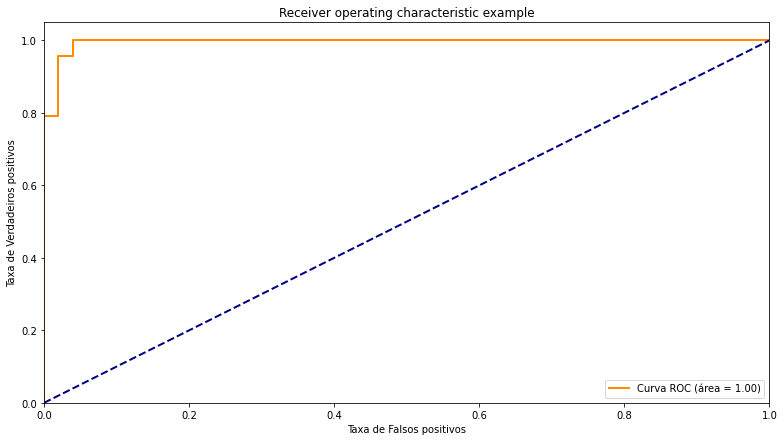

In [ ]:
plt.figure(figsize=(13, 7))
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='Curva ROC (área = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos positivos')
plt.ylabel('Taxa de Verdadeiros positivos')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()